In [0]:
import sklearn
print(sklearn.__version__)

1.2.1


In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model
import mlflow
from math import sqrt
import os
import warnings
import sys
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from urllib.parse import urlparse
import mlflow
import mlflow.sklearn
import numpy as np
import pandas as pd 
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder
# File system manangement
import os
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import logging
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Set Experiment

In [0]:
mlflow.set_experiment("/Test/TestExperiment")

Out[6]: <Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/31112522555611', creation_time=1675199184928, experiment_id='31112522555611', last_update_time=1675199731914, lifecycle_stage='active', name='/Test/TestExperiment', tags={'mlflow.experiment.sourceName': '/Test/TestExperiment',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'ye.wang.20182131@efrei.net',
 'mlflow.ownerId': '6957009316855824'}>

In [0]:
path_1= 'dbfs:/FileStore/tables/application_train.csv'  
path_2= 'dbfs:/FileStore/tables/application_test.csv' 
df = spark.read.csv(path_1,sep=",", inferSchema="true", header="true")
df1 = spark.read.csv(path_2,sep=",", inferSchema="true", header="true")

In [0]:
application_train= df.toPandas()
application_test = df1.toPandas()
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
application_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# data pre-operation
## 1.  drop_missing value

In [0]:
def find_missing(data):
    missing_count = data.isnull().sum().values
    total = len(data)
    ratio_missng = missing_count / total * 100
    return pd.DataFrame(data={'column name':data.columns, 'missing_ratio':ratio_missng})

def drop_missing(train):
    missingcolumns_40 = find_missing(train)
    missingcolumns_40_list = list(missingcolumns_40['column name'][missingcolumns_40.missing_ratio>40])
    train.drop(missingcolumns_40_list, axis=1, inplace=True)
    return train

In [0]:
application_train_pre = drop_missing(application_train)

## 2. encoding label

In [0]:
def encoding_label(train,test):
    le = LabelEncoder()
    le_count = 0

    # Iterate through the columns
    for col in train:
        if train[col].dtype == 'object':
            # If 2 or fewer unique categories
            if len(list(train[col].unique())) <= 2:
                # Train on the training data
                le.fit(train[col])
                # Transform both training and testing data
                train[col] = le.transform(train[col])
                test[col] = le.transform(test[col])

                # Keep track of how many columns were label encoded
                le_count += 1

    print('%d columns were label encoded.' % le_count)

In [0]:
encoding_label(application_train_pre,application_test)

3 columns were label encoded.


## Align the training and testing data, keep only columns present in both dataframes

In [0]:
def Aligning_data(application_train_pre,application_test):
    app_train = pd.get_dummies(application_train_pre)
    app_test = pd.get_dummies(application_test)

    print('Training Features shape: ', app_train.shape)
    print('Testing Features shape: ', app_test.shape)
    train_labels = app_train['TARGET']

    # Align the training and testing data, keep only columns present in both dataframes
    app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

    # Add the target back in
    app_train['TARGET'] = train_labels
    print('Training Features shape: ', app_train.shape)
    print('Testing Features shape: ', app_test.shape)
    anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
    non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
    
    return app_train, app_test, train_labels

In [0]:
app_train, app_test,train_labels= Aligning_data(application_train_pre,application_test)

Training Features shape:  (307511, 182)
Testing Features shape:  (48744, 239)
Training Features shape:  (307511, 179)
Testing Features shape:  (48744, 178)


## Create an anomalous flag column

In [0]:
def Create_an_anomalous_flag_column(app_train,app_test):
    app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

    # Replace the anomalous values with nan
    app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
    app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
    app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
    correlations = app_train.corr()['TARGET'].sort_values()
    app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
    age_data = app_train[['TARGET', 'DAYS_BIRTH']]
    age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

    # Bin the age data
    age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
    age_groups  = age_data.groupby('YEARS_BINNED').mean()
    ext_data = app_train[['TARGET','EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
    ext_data_corrs = ext_data.corr()

In [0]:
Create_an_anomalous_flag_column(app_train,app_test)

# FeatureEngineering

In [0]:
def FeatureEngineering(app_train,app_test):
    poly_features = app_train[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
    poly_features_test = app_test[[ 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

    # imputer for handling missing values

    imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

    poly_target = poly_features['TARGET']

    poly_features = poly_features.drop(columns = ['TARGET'])

    # Need to impute missing values
    poly_features = imputer.fit_transform(poly_features)
    poly_features_test = imputer.transform(poly_features_test)

    # Create the polynomial object with specified degree
    poly_transformer = PolynomialFeatures(degree = 3)
    
    poly_transformer.fit(poly_features)

    # Transform the features
    poly_features = poly_transformer.transform(poly_features)
    poly_features_test = poly_transformer.transform(poly_features_test)
    print('Polynomial Features shape: ', poly_features.shape)
    
    poly_features = pd.DataFrame(poly_features, 
                                 columns = poly_transformer.get_feature_names_out([ 'EXT_SOURCE_2', 
                                                                               'EXT_SOURCE_3', 'DAYS_BIRTH']))

    # Add in the target
    poly_features['TARGET'] = poly_target

    # Find the correlations with the target
    poly_corrs = poly_features.corr()['TARGET'].sort_values()

    # Display most negative and most positive
    print(poly_corrs.head(10))
    print(poly_corrs.tail(5))
    poly_features_test = pd.DataFrame(poly_features_test, 
                                      columns = poly_transformer.get_feature_names_out([ 'EXT_SOURCE_2', 
                                                                                    'EXT_SOURCE_3', 'DAYS_BIRTH']))

    # Merge polynomial features into training dataframe
    poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
    app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

    # Merge polnomial features into testing dataframe
    poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
    app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

    # Align the dataframes
    app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

    # Print out the new shapes
    print('Training data with polynomial features shape: ', app_train_poly.shape)
    print('Testing data with polynomial features shape:  ', app_test_poly.shape)
    app_train_domain = app_train.copy()
    app_test_domain = app_test.copy()

    app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
    app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
    app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
    app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

    app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
    app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
    app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
    app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
    plt.figure(figsize = (12, 20))
    # iterate through the new features
    for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

        # create a new subplot for each source
        plt.subplot(4, 1, i + 1)
        # plot repaid loans
        sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
        # plot loans that were not repaid
        sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')

        # Label the plots
        plt.title('Distribution of %s by Target Value' % feature)
        plt.xlabel('%s' % feature); plt.ylabel('Density');

    plt.tight_layout(h_pad = 2.5)

Polynomial Features shape:  (307511, 20)
EXT_SOURCE_2 EXT_SOURCE_3              -0.194235
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH   -0.181417
EXT_SOURCE_2^2 EXT_SOURCE_3            -0.176589
EXT_SOURCE_2 EXT_SOURCE_3^2            -0.171729
EXT_SOURCE_2                           -0.160303
EXT_SOURCE_3                           -0.157397
EXT_SOURCE_2 DAYS_BIRTH                -0.156879
EXT_SOURCE_3 DAYS_BIRTH                -0.150936
EXT_SOURCE_2^2                         -0.149502
EXT_SOURCE_2^2 DAYS_BIRTH              -0.149298
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64
Training data with polynomial features shape:  (307511, 199)
Testing data with polynomial features shape:   (48744, 199)


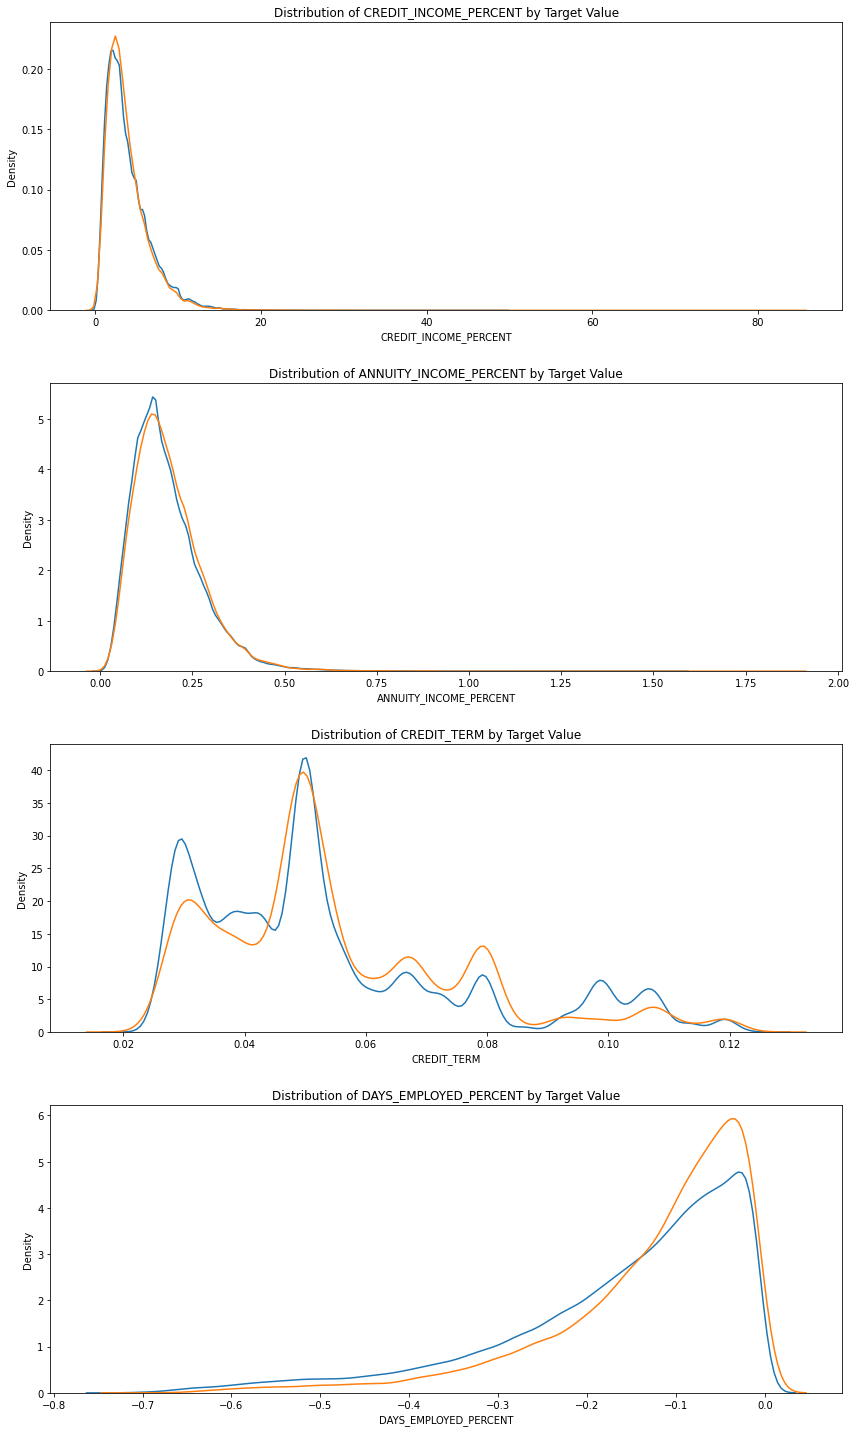

In [0]:
FeatureEngineering(app_train,app_test)

# MLflow Part

In [0]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
#imputer = imputer(missing_values=np.nan,strategy='mean',axis=1)

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [0]:

###log_param###
C=0.0001
###

with mlflow.start_run():
    # Make the model with the specified regularization parameter
    log_reg = LogisticRegression(C = C)

    # Train on the training data
    log_reg.fit(train, train_labels)
    
        
    mlflow.sklearn.log_model(log_reg, "model")
    model_uri = mlflow.get_artifact_uri("model")
    
    #predict_proba
    log_reg_pred = log_reg.predict_proba(test)[:, 1]
    
    
    #predict test for validation
    
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    train_labels,
                                                        test_size=0.2,
                                                        random_state=0)
    predictions=log_reg.predict(X_test)
    print(accuracy_score(y_test,predictions))
    
    mlflow.log_param("C", C)
    mlflow.log_metric("mes",mean_squared_error(y_test,predictions))
    mlflow.log_metric("rmes",sqrt(mean_squared_error(y_test,predictions)))
    mlflow.log_metric("r2",r2_score(y_test,predictions))
    mlflow.sklearn.log_model(log_reg, "model")
    
  
        

0.9210607612636782
